## Supervised and Unsupervised Learning for Country Classification
### Dataset used: Death by area
##### Link to download : http://data.un.org/Explorer.aspx


In [1]:
#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Libraries for Unsupervised learning
from sklearn.cluster import KMeans,AgglomerativeClustering

#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Utility Method to plot confusion matrix
def plotConfusionMatrix(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Read Data from CSV

In [3]:
# Read data from csv and print the head
data = pd.read_csv('Deaths by area.csv')
data.head(5)

,Country,Year,Total
0,Åland Islands,1953,260.0
1,Åland Islands,1954,244.0
2,Åland Islands,1955,200.0
3,Åland Islands,1956,209.0
4,Åland Islands,1957,248.0


#### Get data insights

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 3 columns):
Country    7652 non-null object
Year       7652 non-null int64
Total      7652 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.4+ KB


In [5]:
#lets check number of unique countries we have in dataset
data['Country'].nunique()

184

### Lets normalize data

In [6]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Total']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Total',inplace=True)

In [7]:
# Check new dataframe with normalized value
data_new.head()

,Country,Year,normalized
0,Åland Islands,1953,0.000027
1,Åland Islands,1954,0.000025
2,Åland Islands,1955,0.000020
3,Åland Islands,1956,0.000021
4,Åland Islands,1957,0.000025


#### Using tsfresh to extract features from data

In [8]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:21<00:00,  1.87s/it]


In [9]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Albania,2.119579e-04,0.006893,-0.027466,-0.033881,0.081891,0.001945,0.575203,0.000042,2.692675e-05,0.002180,...,1.219242e-10,1.975375e-10,2.426309e-10,0.0,0.0,0.0,0.0,0.0,3.473176e-08,0.0
American Samoa,2.680168e-08,0.000151,0.000000,0.000000,0.000000,0.000015,0.795909,0.000003,8.741948e-07,0.000027,...,3.367832e-16,7.347029e-16,1.232945e-15,0.0,0.0,0.0,0.0,0.0,3.642025e-11,0.0
Andorra,1.633649e-08,0.000071,0.000000,0.000000,0.000000,0.000024,0.991545,0.000004,5.023006e-07,NaN,...,1.258522e-15,1.807977e-15,3.076855e-15,0.0,0.0,0.0,0.0,0.0,1.734321e-11,0.0
Anguilla,1.206155e-09,0.000033,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,6.500361e-07,NaN,...,1.166892e-18,7.693835e-18,1.426338e-18,0.0,0.0,0.0,0.0,0.0,9.237948e-13,0.0
Antigua and Barbuda,1.562477e-07,0.000268,0.000000,0.000000,0.000000,0.000066,-0.625557,-0.000003,1.822748e-06,0.000081,...,-3.652716e-15,-4.953548e-15,-6.710833e-15,0.0,0.0,0.0,0.0,0.0,4.727019e-11,0.0


In [10]:
#Check shape of new data with extracted features
extracted_features.shape

(184, 794)

In [11]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

548

In [12]:
# it seems 552 columns out of 794 have some null values

In [13]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__fft_coefficient__coeff_36__attr_"angle"'
 'normalized__fft_coefficient__coeff_36__attr_"imag"'
 'normalized__fft_coefficient__coeff_36__attr_"real"'
 'normalized__fft_coefficient__coeff_37__attr_"abs"'
 'normalized__fft_coefficient__coeff_37__attr_"angle"'
 'normalized__fft_coefficient__coeff_37__attr_"imag"'
 'normalized__fft_coefficient__coeff_37__attr_"real"'
 'normalized__fft_coefficient__coeff_38__attr_"abs"'
 'normalized__fft_coefficient__coeff_38__attr_"angle"'
 'normalized__fft_coefficient__coeff_38__attr_"imag"'
 'normalized__fft_coefficient__coeff_38__attr_"real"'
 'normalized__fft_coefficient__coeff_39__attr_"abs"'
 'normalized__fft_coefficient__coeff_39__attr_"angle"'
 'normalized__fft_coefficient__coeff_39__attr_"imag"'
 'normalized__fft_coefficient__coeff_39__attr_"real"'
 'normalized__fft_coefficient__coeff_40__attr_"abs"'
 'normalized__fft_coefficient__coeff_40__attr_"angle"'
 'normalized__fft_coefficient__coeff_40__attr_"imag"'
 'normalized__fft_coefficie

In [14]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [15]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [16]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [17]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Albania,2.119579e-04,0.006893,-0.027466,-0.033881,0.081891,0.001945,0.575203,0.000042,2.692675e-05,...,1.975375e-10,2.426309e-10,0.0,0.0,0.0,0.0,0.0,3.473176e-08,0.0,1
1,American Samoa,2.680168e-08,0.000151,0.000000,0.000000,0.000000,0.000015,0.795909,0.000003,8.741948e-07,...,7.347029e-16,1.232945e-15,0.0,0.0,0.0,0.0,0.0,3.642025e-11,0.0,1
2,Andorra,1.633649e-08,0.000071,0.000000,0.000000,0.000000,0.000024,0.991545,0.000004,5.023006e-07,...,1.807977e-15,3.076855e-15,0.0,0.0,0.0,0.0,0.0,1.734321e-11,0.0,1
3,Anguilla,1.206155e-09,0.000033,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,6.500361e-07,...,7.693835e-18,1.426338e-18,0.0,0.0,0.0,0.0,0.0,9.237948e-13,0.0,1
4,Antigua and Barbuda,1.562477e-07,0.000268,0.000000,0.000000,0.000000,0.000066,-0.625557,-0.000003,1.822748e-06,...,-4.953548e-15,-6.710833e-15,0.0,0.0,0.0,0.0,0.0,4.727019e-11,0.0,1


In [18]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])
y.value_counts()

1    151
0     33
Name: label, dtype: int64

##### Out of 184 countries we have data of 151 developing countries and 33 developed countries

In [19]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 2)


## Supervised learning techniques

#### Support Vector Machine

In [22]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))


Area Under Curve:  0.5


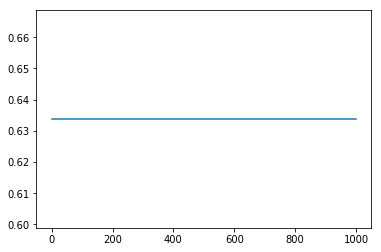

In [21]:
#SVM Fine tunning
cVals = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
f1_scores = []
for c in cVals:
    clf = svm.SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(cVals,f1_scores)

#### Output with best parameters for SVM

In [23]:
clf = svm.SVC(gamma='auto',C=0.001,kernel='rbf')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.74      1.00      0.85        55

   micro avg       0.74      0.74      0.74        74
   macro avg       0.37      0.50      0.43        74
weighted avg       0.55      0.74      0.63        74



#### Logistic Regression

In [24]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.531578947368421
              precision    recall  f1-score   support

           0       0.31      0.26      0.29        19
           1       0.76      0.80      0.78        55

   micro avg       0.66      0.66      0.66        74
   macro avg       0.54      0.53      0.53        74
weighted avg       0.64      0.66      0.65        74



###### KNN with k ranging from 1 to 15

Text(0.5,0,'K values')

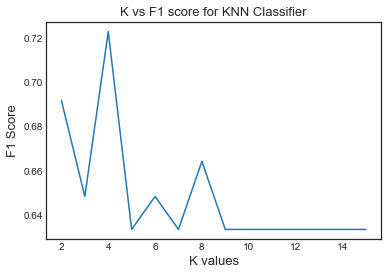

In [45]:
#KNN for different k values
kVals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)
plt.title('K vs F1 score for KNN Classifier',fontsize = 13)
plt.ylabel('F1 Score',fontsize=13)
plt.xlabel('K values',fontsize=13)

#### Output with best value of K

In [25]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.5870813397129186
              precision    recall  f1-score   support

           0       0.67      0.21      0.32        19
           1       0.78      0.96      0.86        55

   micro avg       0.77      0.77      0.77        74
   macro avg       0.72      0.59      0.59        74
weighted avg       0.75      0.77      0.72        74



#### Decision Tree Classifier

In [26]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.6641148325358852
              precision    recall  f1-score   support

           0       0.53      0.47      0.50        19
           1       0.82      0.85      0.84        55

   micro avg       0.76      0.76      0.76        74
   macro avg       0.68      0.66      0.67        74
weighted avg       0.75      0.76      0.75        74



#### Bagging Classifier with Decision Tree as base estimator

[0.7879323225664688, 0.7764561535053339, 0.7764561535053339, 0.7445213182918099, 0.7553065260382333, 0.7663106655042139, 0.7553065260382333, 0.7553065260382333, 0.7764561535053339, 0.7663106655042139, 0.7663106655042139, 0.7764561535053339]


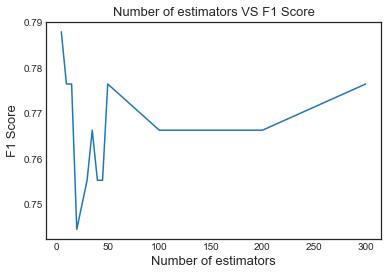

In [48]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=e, random_state=7)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

Area Under Curve:  0.6578947368421053
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.81      1.00      0.89        55

   micro avg       0.82      0.82      0.82        74
   macro avg       0.90      0.66      0.69        74
weighted avg       0.86      0.82      0.79        74



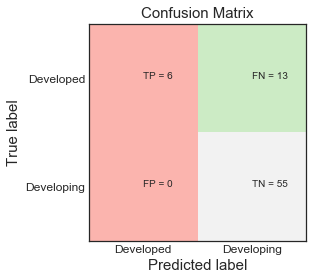

In [29]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=5, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Random Forest Classifier

#### Fine tuninng Random Forest for different number of estimators

[0.780475264346232, 0.8108108108108109, 0.8227416605794984, 0.7913007824512249, 0.7735086578899968, 0.7919987784394563, 0.7735086578899968, 0.7849099099099098, 0.8217132386623913, 0.7965237965237965, 0.8217132386623913, 0.8037075035046637]


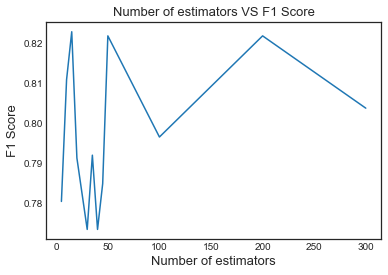

In [50]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=15, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))


Area Under Curve:  0.761244019138756


[0.8037075035046637, 0.7979671481826653, 0.8347812097812097, 0.7691053122087604, 0.7919987784394563, 0.8097452291000677, 0.7965237965237965, 0.7541827541827542, 0.7764561535053339, 0.7226807295099977, 0.7849099099099098]


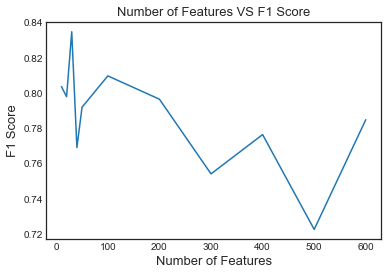

In [53]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=15,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores)
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### RFC with Best Parameters

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=15,max_features=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.7703349282296651
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.88      0.91      0.89        55

   micro avg       0.84      0.84      0.84        74
   macro avg       0.79      0.77      0.78        74
weighted avg       0.83      0.84      0.83        74



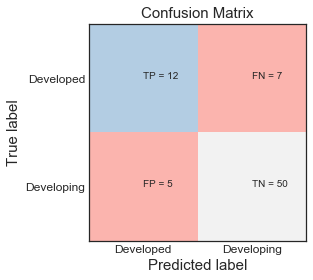

In [32]:
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Extra tree classifier

###### Fine tune for number of estimators

[0.8191273447910615, 0.8108108108108109, 0.8311438373357877, 0.8311438373357877, 0.8433215824520173, 0.8268289841565702, 0.8592865311131564, 0.8433215824520173, 0.8469539071308981, 0.8592865311131564, 0.7919987784394563, 0.7919987784394563]


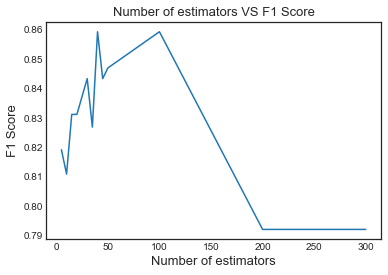

In [56]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

In [33]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.7885167464114832
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.88      0.95      0.91        55

   micro avg       0.86      0.86      0.86        74
   macro avg       0.84      0.79      0.81        74
weighted avg       0.86      0.86      0.86        74



#### fine tune for max_features

[0.7979671481826653, 0.8268289841565702, 0.7919987784394563, 0.8592865311131564, 0.8268289841565702, 0.7735086578899968, 0.8156370656370656, 0.8217132386623913, 0.8339063491193308, 0.8339063491193308, 0.8339063491193308]


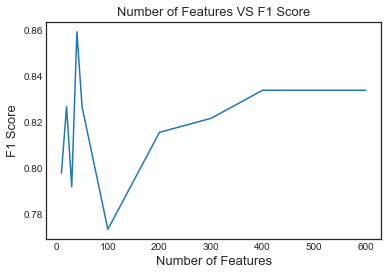

In [58]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=100,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### Best ExtraTree Classifier

In [34]:
model = ExtraTreesClassifier(n_estimators=100,max_features=40,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve: ",metrics.auc(fpr,tpr))
print(classification_report(y_test,pred))

Area Under Curve:  0.7885167464114832
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.88      0.95      0.91        55

   micro avg       0.86      0.86      0.86        74
   macro avg       0.84      0.79      0.81        74
weighted avg       0.86      0.86      0.86        74



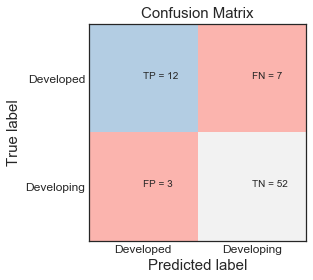

In [35]:
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Treating problem as Unsupervised learning

In [61]:
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

### K-Means Clustering

             precision    recall  f1-score   support

          0       0.18      1.00      0.31        33
          1       1.00      0.01      0.01       151

avg / total       0.85      0.18      0.07       184



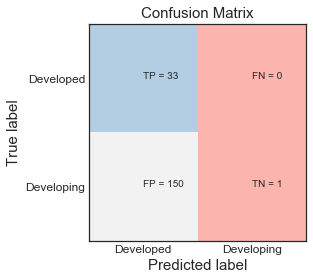

In [62]:
#Build model for k-means clustering
model = KMeans(n_clusters=2,n_init=400,random_state=42,max_iter=1000)
model.fit(X)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusionMatrix(confusion_matrix(y_arr,y_pred))

### Lets do principal component analysis and Singular Value Decomposition

#### First standardize data and then perform PCA

#### Lets plot 2-D graph and check how points are distributed

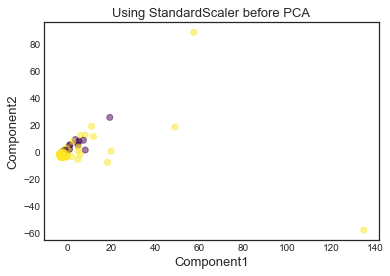

In [63]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.title('Using StandardScaler before PCA',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)
plt.show()

#### How does it look in 3D

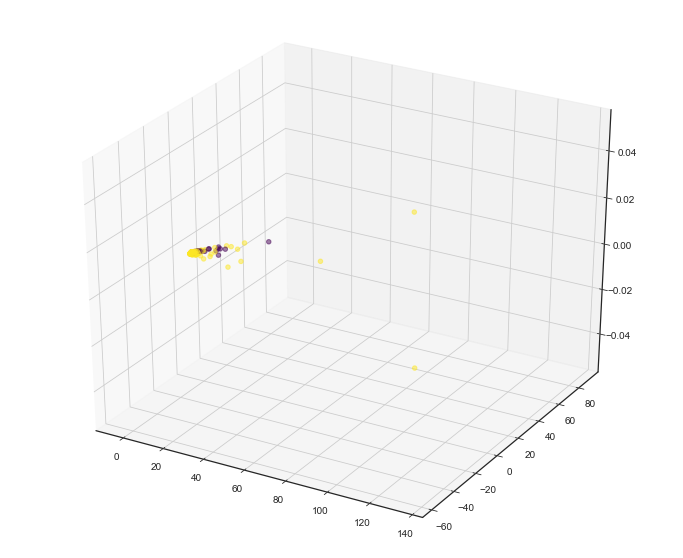

In [64]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
e = df[2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.show()

##  SVD

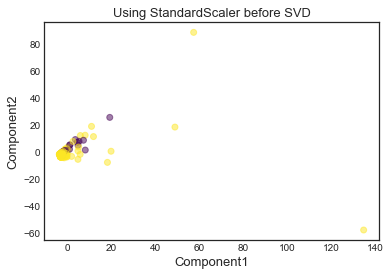

In [65]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = TruncatedSVD(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.title('Using StandardScaler before SVD',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)
plt.show()

#### SVD is same as PCA

#### Lets check how data looks if we do min max scaling and then PCA

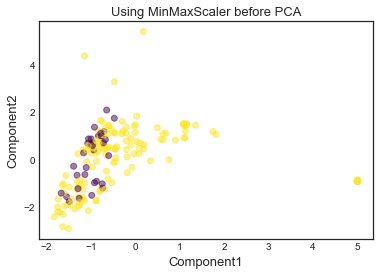

In [66]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.title('Using MinMaxScaler before PCA',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)
plt.show()

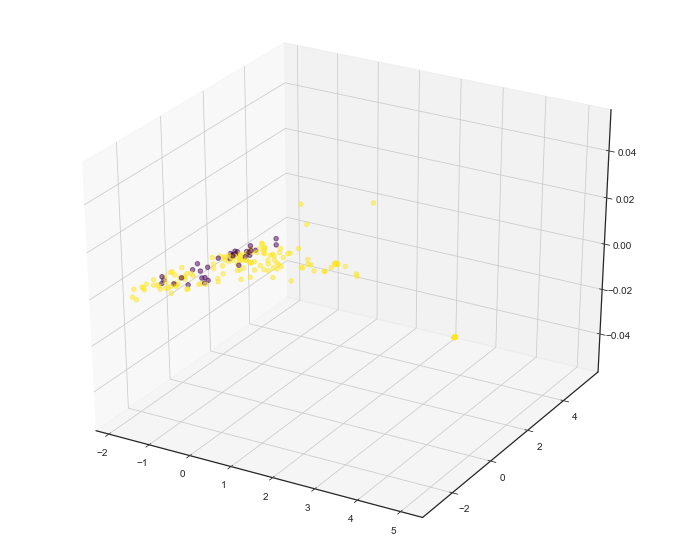

In [67]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
e = df[2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.show()

#### SVD with minmaxscaling

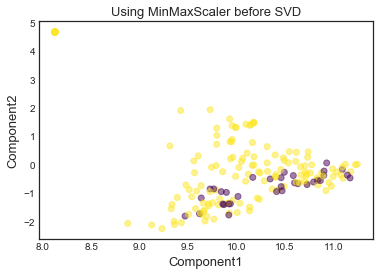

In [68]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = TruncatedSVD(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.title('Using MinMaxScaler before SVD',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)
plt.show()

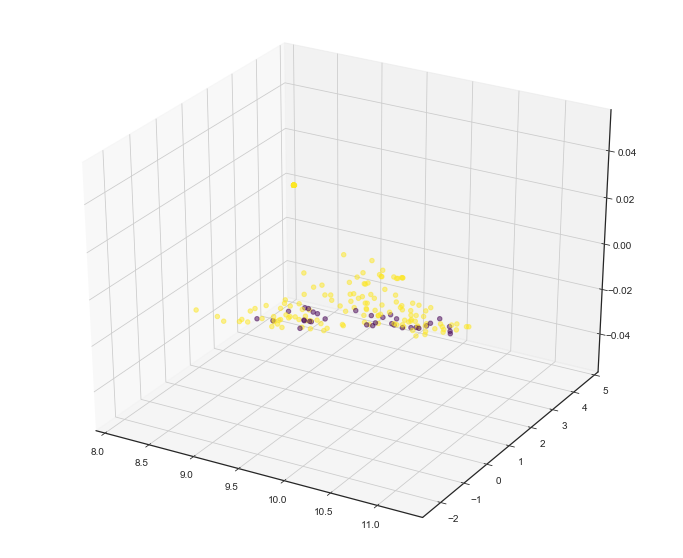

In [69]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = TruncatedSVD(n_components=3)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
e = df[2]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.show()

In [70]:
#Utility function to perform clustering with different algos, dimensionality reduction, different number of components
def testFunctions(algo,scaling,drTechnique,dimensions,X,y_arr):
    if scaling == 'Standard':
        scaler = StandardScaler()
    elif scaling == 'MinMax':
        scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(X)
    scaled_df = pd.DataFrame(scaled_df)
    
    if drTechnique == 'PCA':
        pca = PCA(n_components=dimensions)  
        X_pca = pca.fit_transform(scaled_df)
    elif drTechnique == 'SVD':
        pca = TruncatedSVD(n_components=dimensions)  
        X_pca = pca.fit_transform(scaled_df)
        
    if algo == 'KMeans':
        model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
    elif algo == 'AggClustering':
        model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        
    model.fit(X_pca)
    y_pred = model.labels_
    score = f1_score(y_pred,y_arr,average='weighted')
    return score

## K Means

lets check f1 scores for different number of principal components

[0.3040180055620933, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474]


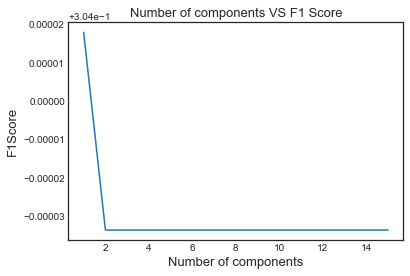

In [71]:
dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions('KMeans','Standard','PCA',dim,X,y_arr))

plt.plot(dimensions_,scores)
plt.title('Number of components VS F1 Score',fontsize = 13)
plt.xlabel("Number of components",fontsize = 13)
plt.ylabel("F1Score",fontsize = 13)
print(scores)

[0.32403546200895456, 0.7413388543823326, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456]


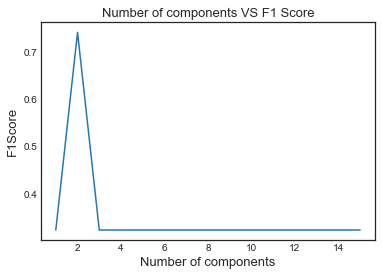

In [73]:
dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions('KMeans','MinMax','PCA',dim,X,y_arr))

plt.plot(dimensions_,scores)
plt.title('Number of components VS F1 Score',fontsize = 13)
plt.xlabel("Number of components",fontsize = 13)
plt.ylabel("F1Score",fontsize = 13)
print(scores)

[0.7257257952493401, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456]


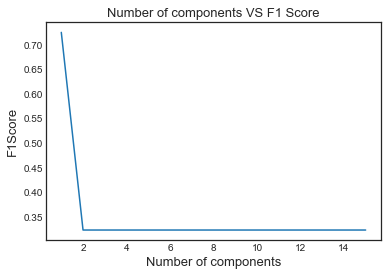

In [74]:
dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions('KMeans','MinMax','SVD',dim,X,y_arr))

plt.plot(dimensions_,scores)
plt.title('Number of components VS F1 Score',fontsize = 13)
plt.xlabel("Number of components",fontsize = 13)
plt.ylabel("F1Score",fontsize = 13)
print(scores)

#### Best results for K Means 

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        33
          1       0.80      0.87      0.83       151

avg / total       0.66      0.71      0.68       184



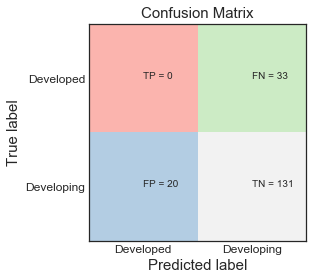

In [75]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusionMatrix(confusion_matrix(y_arr,y_pred))

#### Lets see how did K-Means clustering performed and compare original points vs predicted points

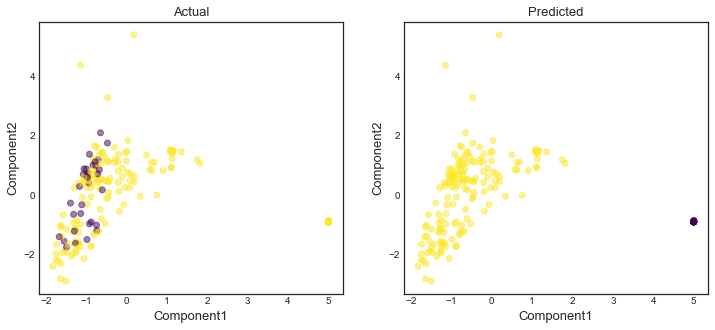

In [76]:
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.title('Actual',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)

plt.subplot(1,2,2)
plt.scatter(a,b,alpha=0.5,c=y_pred,cmap='viridis')
plt.title('Predicted',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)
plt.show()

## Agglomerative Clustering

[0.8770298585646935, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474, 0.30396643783371474]


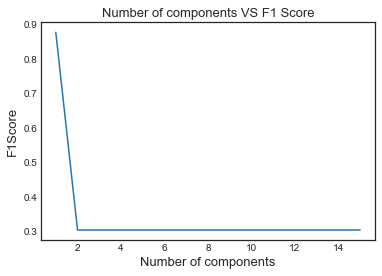

In [77]:
# Standardscaling + PCA
dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions('AggClustering','Standard','PCA',dim,X,y_arr))

plt.plot(dimensions_,scores)
plt.title('Number of components VS F1 Score',fontsize = 13)
plt.xlabel("Number of components",fontsize = 13)
plt.ylabel("F1Score",fontsize = 13)
print(scores)

[0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456]


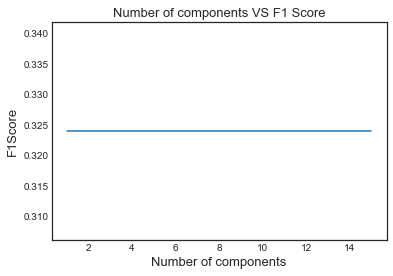

In [78]:
## MinMaxScaling + PCA
dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions('AggClustering','MinMax','PCA',dim,X,y_arr))

plt.plot(dimensions_,scores)
plt.title('Number of components VS F1 Score',fontsize = 13)
plt.xlabel("Number of components",fontsize = 13)
plt.ylabel("F1Score",fontsize = 13)
print(scores)

[0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456, 0.32403546200895456]


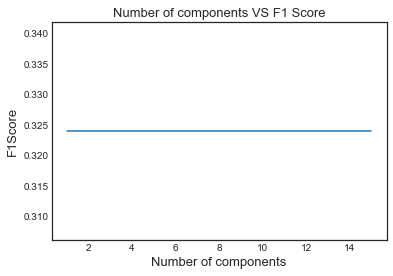

In [79]:
# MinMax Scaling + SVD
dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions('AggClustering','MinMax','SVD',dim,X,y_arr))

plt.plot(dimensions_,scores)
plt.title('Number of components VS F1 Score',fontsize = 13)
plt.xlabel("Number of components",fontsize = 13)
plt.ylabel("F1Score",fontsize = 13)
print(scores)

#### Using best parameters for Agg clustering

             precision    recall  f1-score   support

          0       0.18      1.00      0.31        33
          1       1.00      0.01      0.01       151

avg / total       0.85      0.18      0.07       184



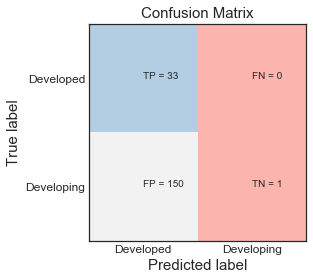

In [80]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_pca)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusionMatrix(confusion_matrix(y_arr,y_pred))

#### Lets see how did Agglomerative clustering performed and compare original points vs predicted points

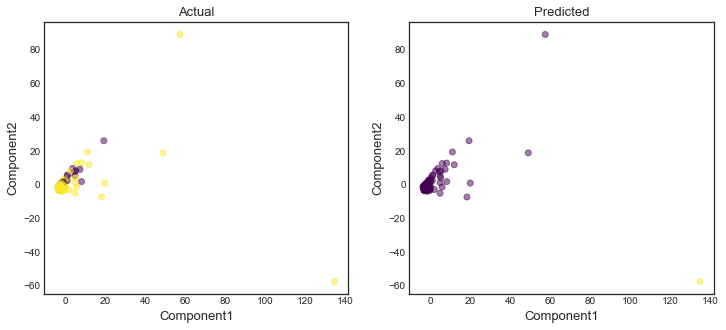

In [81]:
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.title('Actual',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)

plt.subplot(1,2,2)
plt.scatter(a,b,alpha=0.5,c=y_pred,cmap='viridis')
plt.title('Predicted',fontsize=13)
plt.xlabel('Component1',fontsize=13)
plt.ylabel('Component2',fontsize=13)
plt.show()